In [ ]:
!pip install xlrd
!pip install openpyxl 


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 24.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd

archivo = '/work/Ventas_Videojuegos.xlsx'
df = pd.read_excel(archivo)

bins = [1980, 1990, 2000, 2010, 2020]
labels = ['1980', '1990', '2000', '2010']
df['Decada'] = pd.cut(df['Año'], bins=bins, labels=labels, right=False)


In [ ]:
columns = ['Decada','Plataforma','Genero','Ventas NA','Ventas EU','Ventas JP','Ventas Otros']
df2 = df[columns]
dFinal = df2.groupby(['Decada','Genero']).sum()

# Ventas por Genero según Decada

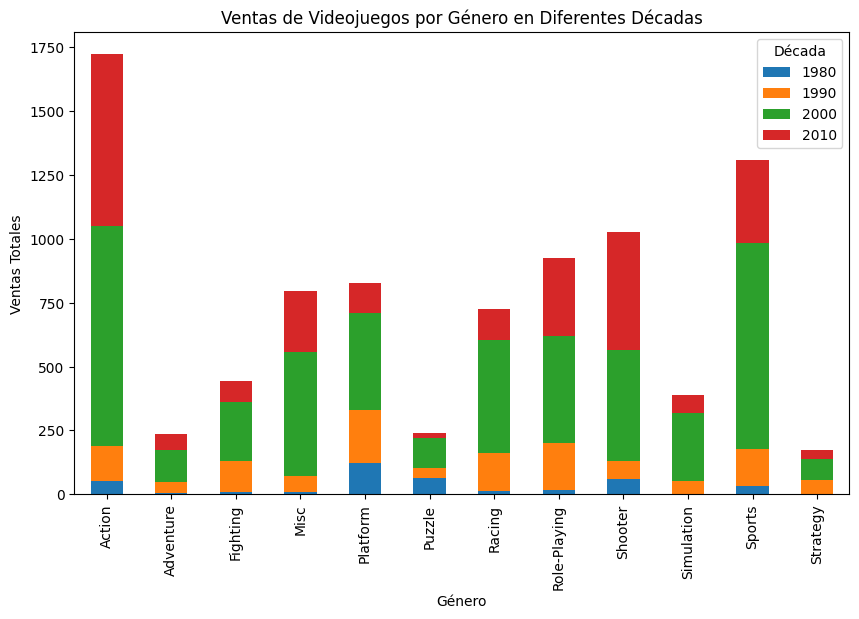

In [ ]:
import matplotlib.pyplot as plt

decadas_unicas = dFinal.index.get_level_values('Decada').unique()

fig, ax = plt.subplots(figsize=(10, 6))

ventas_apiladas = pd.DataFrame()

for decada in decadas_unicas:
    decada_data = dFinal.xs(key=decada, level='Decada')

    ventas_apiladas[decada] = decada_data.sum(axis=1)

ventas_apiladas.plot(kind='bar', stacked=True, ax=ax)

plt.title('Ventas de Videojuegos por Género en Diferentes Décadas')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.legend(title='Década')
plt.show()


# Ventas por Genero según Decada - Detallado

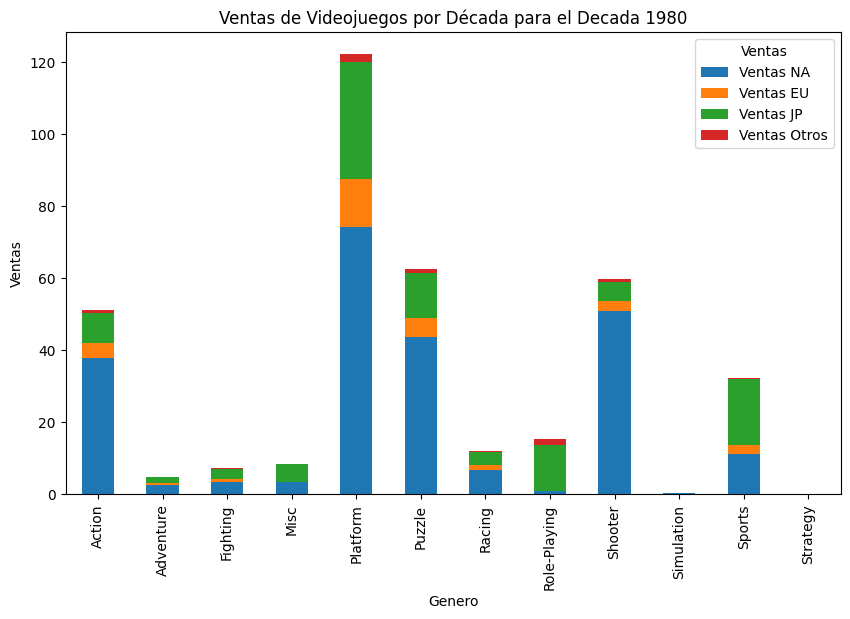

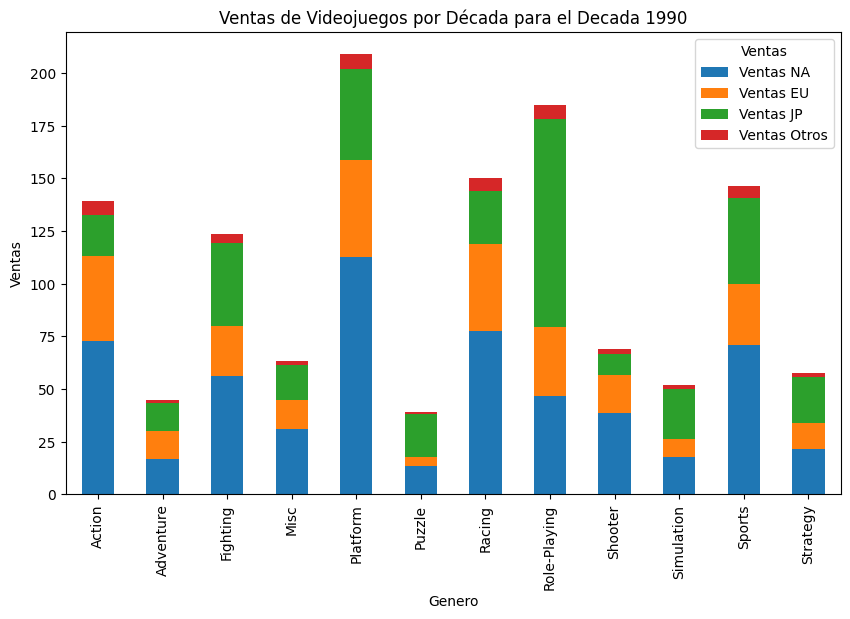

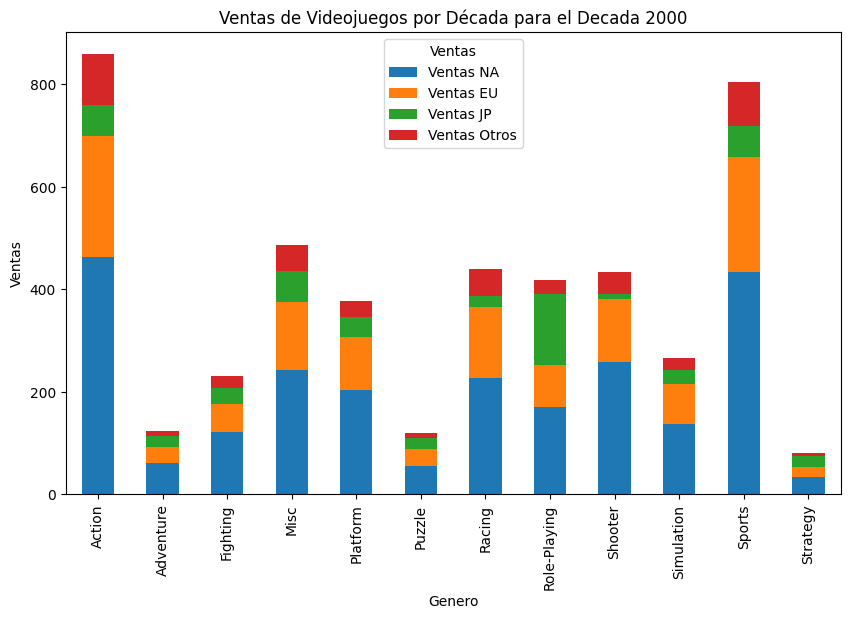

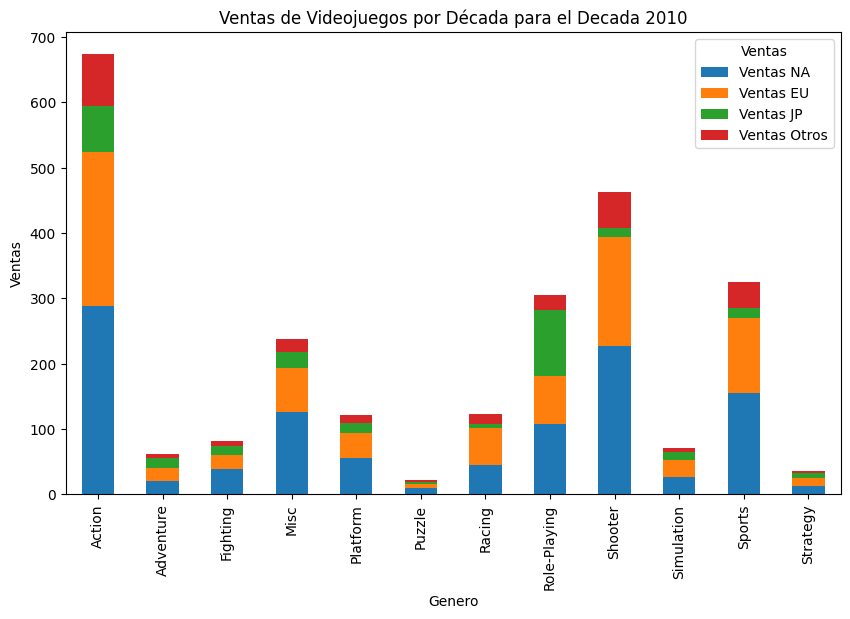

In [ ]:
import matplotlib.pyplot as plt

decadas_unicas = dFinal.index.get_level_values('Decada').unique()

for decada in decadas_unicas:
    decada_data = dFinal.xs(key=decada, level='Decada')

    decada_data.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Ventas de Videojuegos por Década para el Decada {decada}')
    plt.xlabel('Genero')
    plt.ylabel('Ventas')
    plt.legend(title='Ventas')

    plt.show()


# Ventas por Plataforma según Decada - Detallado

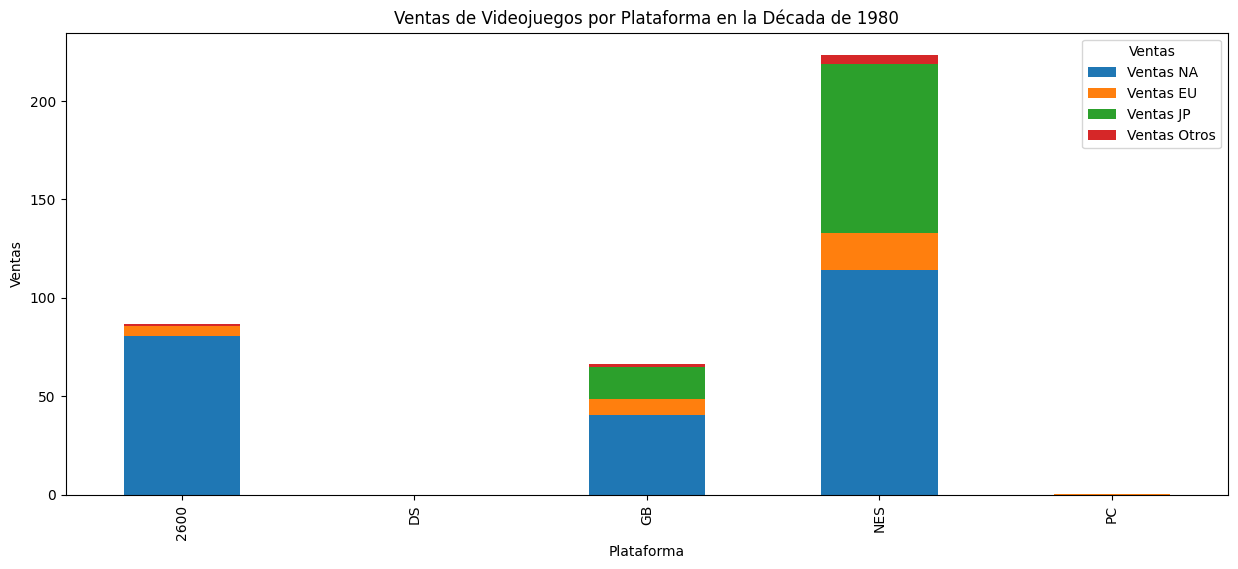

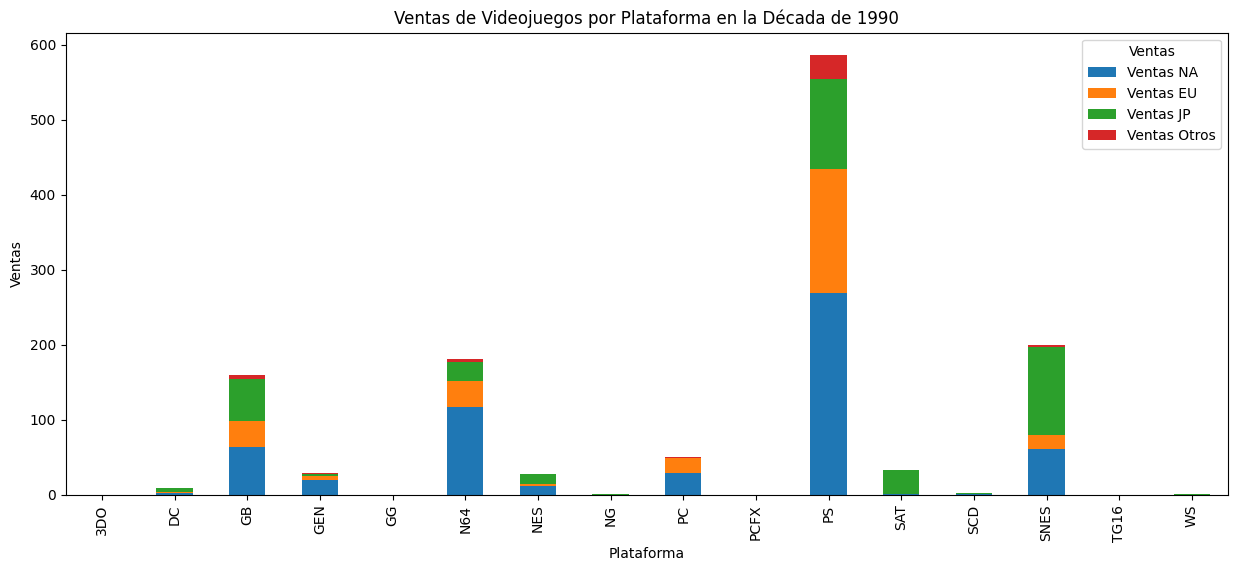

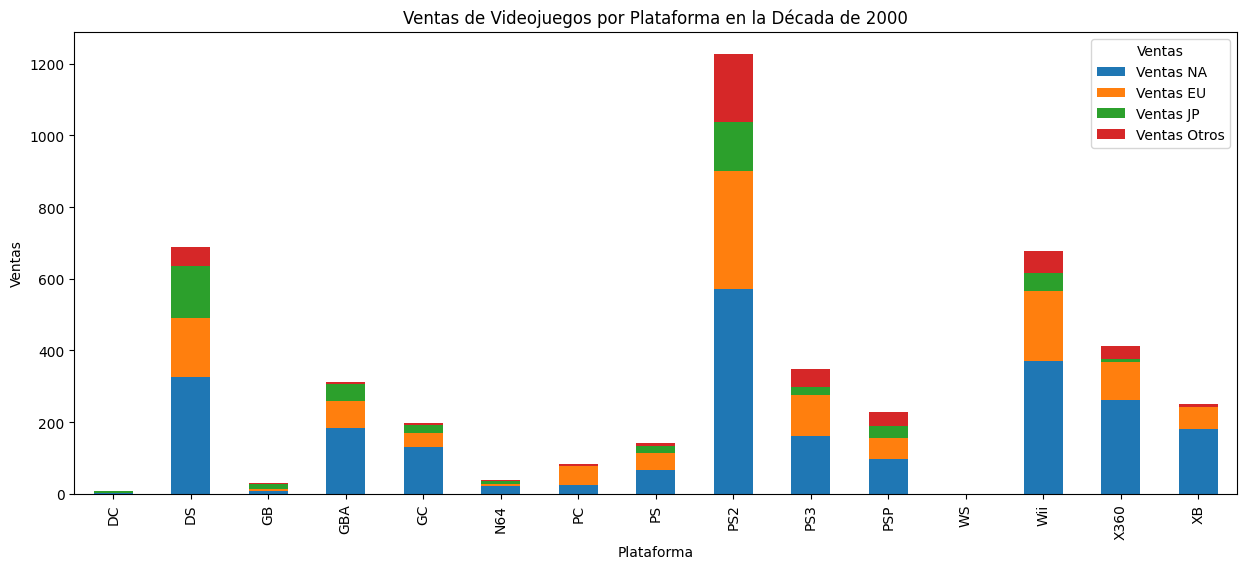

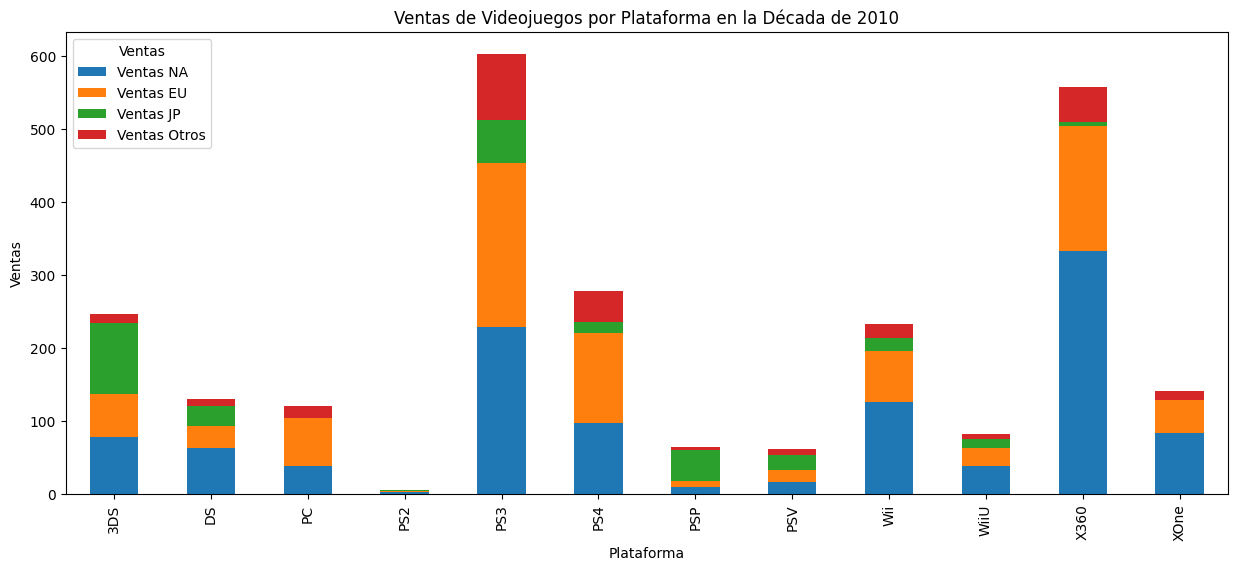

In [ ]:
columns = ['Decada','Plataforma','Genero','Ventas NA','Ventas EU','Ventas JP','Ventas Otros']
df3 = df[columns]
dPlataform = df3.groupby(['Decada','Plataforma']).sum()

decadas_unicas = dPlataform.index.get_level_values('Decada').unique()

for decada in decadas_unicas:
    decada_data = dPlataform.xs(key=decada, level='Decada')
    decada_data = decada_data.loc[decada_data.sum(axis=1) > 0]

    if not decada_data.empty:
        decada_data.plot(kind='bar', stacked=True, figsize=(15, 6))

        plt.title(f'Ventas de Videojuegos por Plataforma en la Década de {decada}')
        plt.xlabel('Plataforma')
        plt.ylabel('Ventas')
        plt.legend(title='Ventas')

        plt.show()

# Top 10 de Ventas por Editorial según Decada

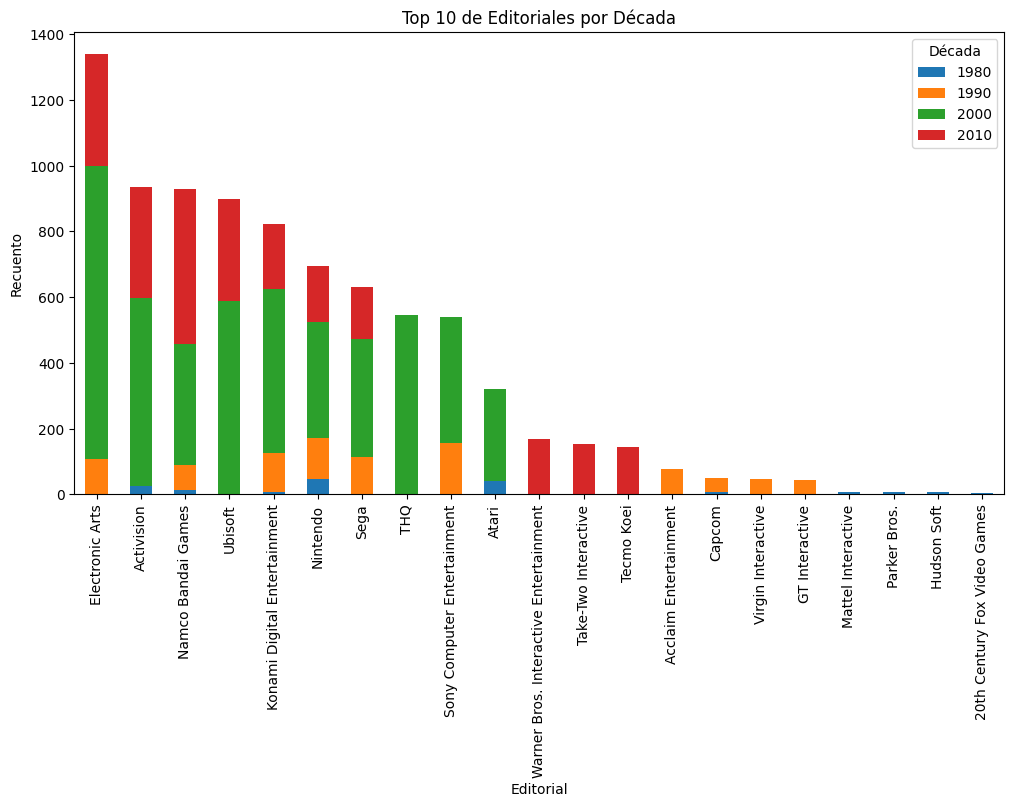

In [ ]:
editorial = df.groupby(['Decada'])['Editorial'].value_counts()
top10 = editorial.groupby('Decada').head(10)
top10 = top10.unstack(level='Decada')
editorial_totals = top10.sum(axis=1)

top10 = top10.loc[editorial_totals.sort_values(ascending=False).index]
top10.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Top 10 de Editoriales por Década')
plt.xlabel('Editorial')
plt.ylabel('Recuento')
plt.legend(title='Década')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9721bbcd-2204-429b-9a78-57146379701b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>